In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Dataset from https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

In [2]:
df = pd.read_csv('Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.isnull().any(axis=0)

status_id           False
status_type         False
status_published    False
num_reactions       False
num_comments        False
num_shares          False
num_likes           False
num_loves           False
num_wows            False
num_hahas           False
num_sads            False
num_angrys          False
Column1              True
Column2              True
Column3              True
Column4              True
dtype: bool

In [4]:
# drop null columns
df = df.drop(df.iloc[:, -4:], axis=1)
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [5]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [6]:
df.shape

(7050, 12)

In [7]:
df = df.drop_duplicates()
df.shape

(6999, 12)

In [8]:
df.dtypes

status_id           object
status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

In [9]:
df['status_published'] = pd.to_datetime(df['status_published'])
df.dtypes

status_id                   object
status_type                 object
status_published    datetime64[ns]
num_reactions                int64
num_comments                 int64
num_shares                   int64
num_likes                    int64
num_loves                    int64
num_wows                     int64
num_hahas                    int64
num_sads                     int64
num_angrys                   int64
dtype: object

In [10]:
df['status_published'].min(), df['status_published'].max()
# 6 year duration

(Timestamp('2012-07-15 02:51:00'), Timestamp('2018-06-13 01:12:00'))

In [11]:
df['year'] = df['status_published'].dt.year
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018


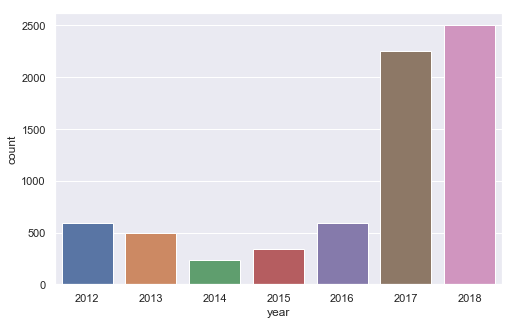

In [12]:
plt.figure(figsize=(8,5))
sns.set()
sns.countplot(data=df, x='year')
# data mainly in 2017-2018, maybe facebook live is getting popular in recent days

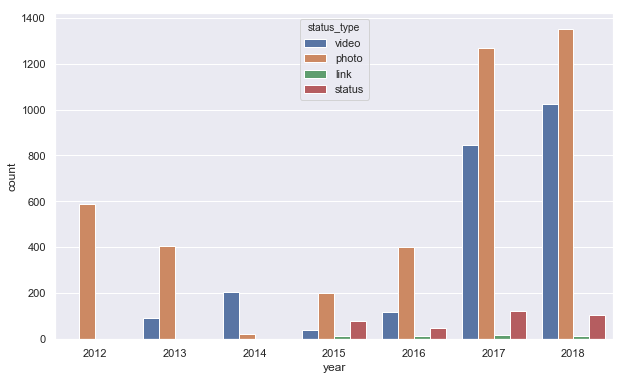

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='year', hue='status_type')

In [14]:
statustype = df.groupby('status_type').nunique().sort_values('status_id', ascending=False)
statustype

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year
status_type,,,,,,,,,,,,,
photo,4242,1,4210,686,176,78,683,41,27,23,19,14,7
video,2333,1,2301,706,933,500,661,229,53,34,15,8,6
status,359,1,359,252,90,25,242,18,19,6,10,3,5
link,63,1,62,51,15,17,51,3,4,2,1,1,5


In [15]:
max_type = pd.DataFrame(statustype.idxmax())
max_type.T

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year
0,photo,photo,photo,video,video,video,photo,video,video,video,photo,photo,photo


In [16]:
del statustype['status_type']
statustype = statustype.reset_index()
statustype

,status_type,status_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year
0,photo,4242,4210,686,176,78,683,41,27,23,19,14,7
1,video,2333,2301,706,933,500,661,229,53,34,15,8,6
2,status,359,359,252,90,25,242,18,19,6,10,3,5
3,link,63,62,51,15,17,51,3,4,2,1,1,5


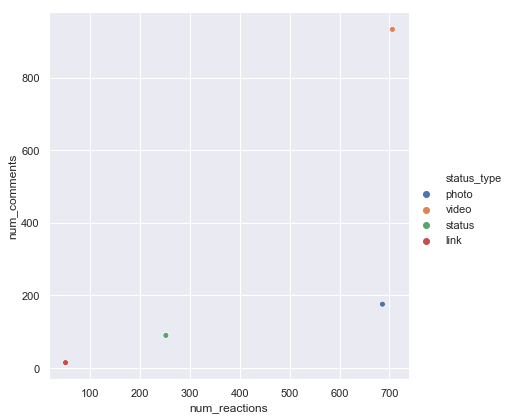

In [17]:
sns.relplot(data=statustype, x='num_reactions', y='num_comments', hue='status_type', height=6)

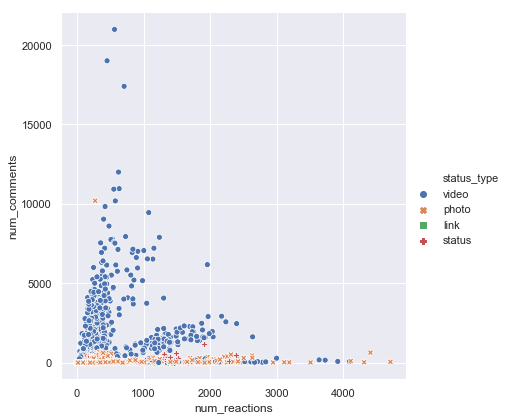

In [18]:
sns.relplot(data=df, x='num_reactions', y='num_comments', hue='status_type', style='status_type', height=6)
# maybe for video, there is a lot more info compared to photo, ppl are willing to leave comments

Text(0.5, 0, 'num_shares')

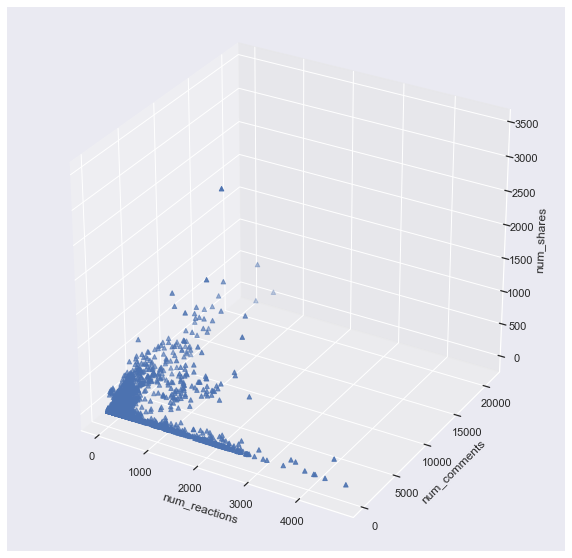

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.num_reactions, df.num_comments, df.num_shares, marker='^')
ax.set_xlabel('num_reactions')
ax.set_ylabel('num_comments')
ax.set_zlabel('num_shares')

In [20]:
df.num_reactions.max(), df.num_comments.max(), df.num_shares.max()

(4710, 20990, 3424)

In [21]:
df.num_shares.idxmax()

4543

In [22]:
pd.DataFrame(df.iloc[4543]).T

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year
4543,725980084255106_860707137449066,video,2018-05-09 08:33:00,1970,2903,3424,1330,482,138,13,5,2,2018


In [23]:
statustype

,status_type,status_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year
0,photo,4242,4210,686,176,78,683,41,27,23,19,14,7
1,video,2333,2301,706,933,500,661,229,53,34,15,8,6
2,status,359,359,252,90,25,242,18,19,6,10,3,5
3,link,63,62,51,15,17,51,3,4,2,1,1,5


In [24]:
st = statustype[['status_type', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]
st

,status_type,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,photo,683,41,27,23,19,14
1,video,661,229,53,34,15,8
2,status,242,18,19,6,10,3
3,link,51,3,4,2,1,1


In [25]:
table = st.T
table

,0,1,2,3
status_type,photo,video,status,link
num_likes,683,661,242,51
num_loves,41,229,18,3
num_wows,27,53,19,4
num_hahas,23,34,6,2
num_sads,19,15,10,1
num_angrys,14,8,3,1


In [26]:
table.columns = table.iloc[0]
table

status_type,photo,video,status,link
status_type,photo,video,status,link
num_likes,683,661,242,51
num_loves,41,229,18,3
num_wows,27,53,19,4
num_hahas,23,34,6,2
num_sads,19,15,10,1
num_angrys,14,8,3,1


In [27]:
table = table.drop('status_type')
table

status_type,photo,video,status,link
num_likes,683,661,242,51
num_loves,41,229,18,3
num_wows,27,53,19,4
num_hahas,23,34,6,2
num_sads,19,15,10,1
num_angrys,14,8,3,1


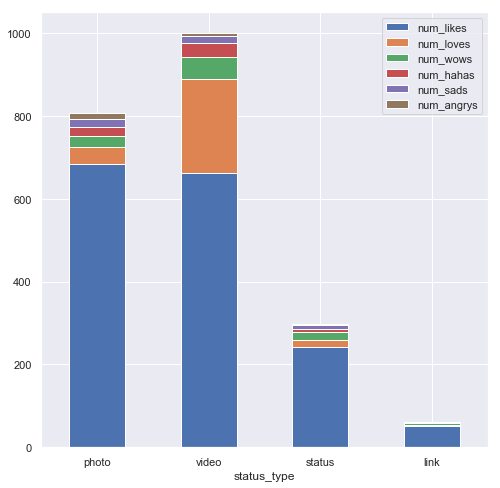

In [28]:
table.T.plot(kind='bar', stacked=True, figsize=(8,8), rot=0)

In [31]:
# only keep columns with numeric data
df1 = df.drop(df.iloc[:, :3], axis=1)
df1.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year
0,529,512,262,432,92,3,1,1,0,2018
1,150,0,0,150,0,0,0,0,0,2018
2,227,236,57,204,21,1,1,0,0,2018
3,111,0,0,111,0,0,0,0,0,2018
4,213,0,0,204,9,0,0,0,0,2018


In [32]:
df1.dtypes

num_reactions    int64
num_comments     int64
num_shares       int64
num_likes        int64
num_loves        int64
num_wows         int64
num_hahas        int64
num_sads         int64
num_angrys       int64
year             int64
dtype: object

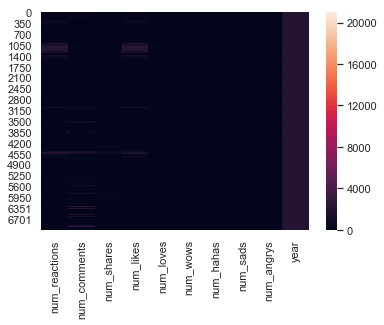

In [33]:
sns.heatmap(data=df1)
# sadly no correlation

[Text(0.5, 1.0, 'Total Reactions by Status Type'), None]

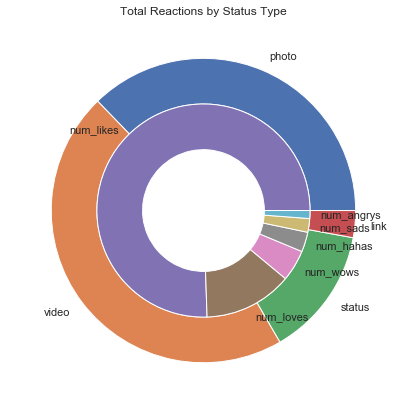

In [46]:
fig, ax = plt.subplots(figsize=(7,7))

size = 0.3
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(table.sum(axis=0), radius=1,
       wedgeprops=dict(width=size, edgecolor='w'), labels=table.columns)

ax.pie(table.sum(axis=1), radius=1-size, 
       wedgeprops=dict(width=size, edgecolor='w'), labels=table.index)

ax.set(aspect="equal", title='Total Reactions by Status Type')

Text(0.5, 0.98, 'Total Reactions by Status Type')

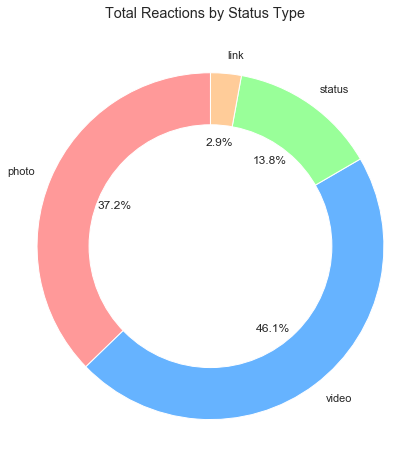

In [47]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(table.sum(axis=0), colors=colors, labels=table.columns, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.suptitle('Total Reactions by Status Type')